<a href="https://colab.research.google.com/github/hjn14133/Machine-Learning/blob/main/Histogradient_Regression_yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Initial Setup
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn import metrics

In [32]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [33]:
# Importing the dataset
df = pd.read_csv("FT_join_JH_cleaned.csv")

#Select columns
X = df[['DISTANCE', 'Heading','Elevation', 'AppliedRat']]
y = df['VRYIELDBAL']
# y = df['Loan_Rat']

In [34]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 0)

In [35]:
# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental    import enable_hist_gradient_boosting
from sklearn.ensemble        import HistGradientBoostingRegressor

from sklearn.model_selection import KFold
from sklearn.metrics         import mean_absolute_error

In [36]:
hist_regressor =  HistGradientBoostingRegressor()
hist_regressor.fit(X_train, y_train)

# predict the results
y_pred=hist_regressor.predict(X_test)

In [37]:
hist_regressor.get_params()

{'categorical_features': None,
 'early_stopping': 'auto',
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_bins': 255,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': None,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [38]:
print('Training Coefficient of R^2 : %.3f'%hist_regressor.score(X_train, y_train))
print('Test Coefficient of R^2 : %.3f'%hist_regressor.score(X_test, y_test))

Training Coefficient of R^2 : 0.755
Test Coefficient of R^2 : 0.637


In [39]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')


# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.39 .
Accuracy: 66.96 %.


In [40]:
# Print result of MAE
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))

# Print result of MSE
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

# Print result of RMSE
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  0.38648901515586626
MSE:  0.2991547162311631
RMSE:  0.5469503782164915


In [41]:
# Get numerical feature importances - 'HistGradientBoostingRegressor' object has no attribute 'feature_importances_'
### importances = list(hist_regressor.feature_importances_)
### importances = importances/sum(importances)
### feature_list = list(X.columns)
# List of tuples with variable and importance
### feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
### feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
### [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

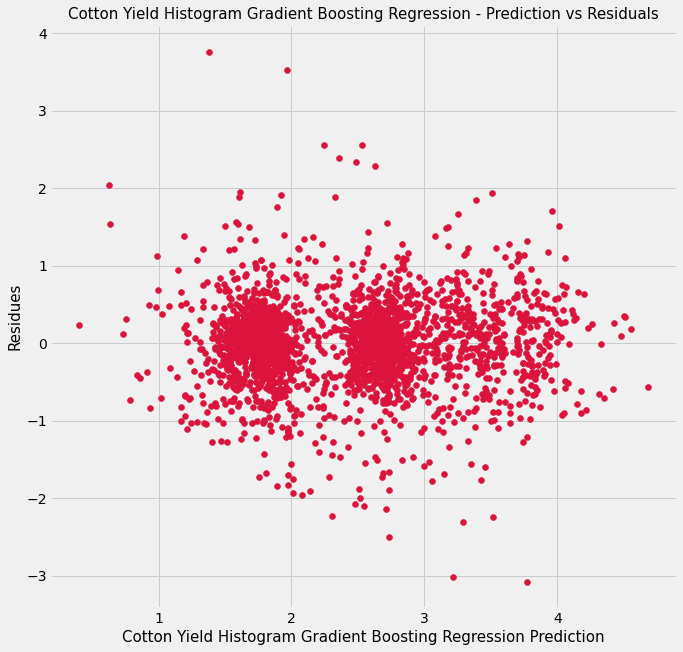

In [42]:
# Plot actual data and predictions 
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,10))
plt.scatter(y_pred, (y_test-y_pred), c='crimson')

plt.title('Cotton Yield Histogram Gradient Boosting Regression - Prediction vs Residuals', fontsize=15)
plt.xlabel('Cotton Yield Histogram Gradient Boosting Regression Prediction', fontsize=15)
plt.ylabel('Residues', fontsize=15)
plt.show()